In [1]:
#importo la mierda
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [2]:
#algunas variables
final=100
time=np.linspace(0,final,final+1)

#definimos la forma de calcular el precio
def pr(k,c,v,p):
    return p*(k*(c-v)+1)
def co(p,dp,ddp,a,b,c,d):
    return a*ddp+b*dp-c*p+d
def ve(p,dp,ddp,e,f,g,h):
    return -e*ddp-f*dp+g*p+h

#hacemos el seguimiento del precio
def price(k,a,b,c,d,e,f,g,h,p0,p1,p2):
    price=np.array([p0,p1,p2])
    for i in range(2,final):
        p=price[i]
        dp=price[i]-price[i-1]
        ddp=(price[i]-price[i-1])-(price[i-1]-price[i-2])
        c=co(p,dp,ddp,a,b,c,d)
        v=ve(p,dp,ddp,e,f,g,h)
        price=np.append(price,pr(k,c,v,p))
    return price




[0.1        0.2        0.4        0.4728     0.48667914 0.53765041
 0.58661584 0.6374371  0.69004966 0.74487207 0.8012555  0.85917729
 0.91834848 0.97859974 1.03967618 1.10138097 1.16347982 1.22577449
 1.288049   1.35011836 1.41178794 1.47289437 1.53326671 1.59276877
 1.65125361 1.70861645 1.76473157 1.81953062 1.87290116 1.92482103
 1.97517232 2.02400378 2.07114653 2.11678771 2.16058813 2.20306626
 2.24337448 2.28294042 2.31938315 2.35685659 2.38815707 2.4261602
 2.44773502 2.49515804 2.49011619 2.57834922 2.48126322 2.71836004
 2.25345144 2.88350408 1.08012826 1.20463442 1.47901049 1.55866377
 1.54267656 1.63853258 1.66004708 1.77031294 1.74953273 1.89543999
 1.80851781 2.0302809  1.78648573 2.14822742 1.57074501 2.04862554
 1.22029424 1.59280645 1.22827377 1.58742007 1.18818942 1.4901473
 1.23814175 1.52006196 1.27993114 1.55240154 1.3232601  1.60077753
 1.3515923  1.64336985 1.36052897 1.67105835 1.34838983 1.6744844
 1.32326807 1.65571929 1.29890594 1.6283196  1.2850828  1.6065135

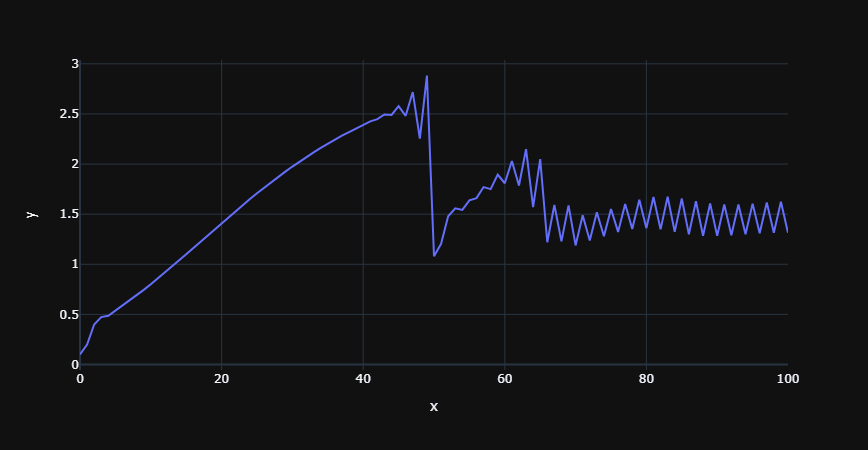

In [15]:
#testeo
k1=0.01
wc=[18,6,1,16]  #estos son los coeficientes de la demanda
wv=[8,1,1,1] #estos los coeficientes de la oferta
his=[0.1,0.2,0.4] #estos son los tres primeros precios



pp=his[2]
dpp=his[2]-his[1]
ddpp=(his[2]-his[1])-(his[1]-his[0])
l=price(k1,wc[0],wc[1],wc[2],wc[3],wv[0],wv[1],wv[2],wv[3],his[0],his[1],his[2])
print(l)
print(co(pp,dpp,ddpp,wc[0],wc[1],wc[2],wc[3]))
print(ve(pp,dpp,ddpp,wv[0],wv[1],wv[2],wv[3]))
pio.show(px.line( x=time, y=l))

        